## Deep Neural Network from Scratch

**Following up from our last notebook, we will discuss applying Deep Neural Netowks for Binary and Multiclass classification for different datasets. Also, here we will lay the foundations for our modules associated with our different steps of the pipeline(like cost functions, activations, etc). Here, we will also go through all the advanced concepts of Neural networks, some of which includes:**

- Optimization techniques (Adam, RMSprop, Momentum)
- Batch Normalization
- Gradient Clipping
- Dropout, L1/L2 regularization
- Learning rate decay
- Early stopping
- Analysing results with different metrics (R2-score, f1-score, Confusion matrix, AUC-ROC curves)

_We will make different modules (.py files) from which we will import our functions for now, with classes for different tasks. Later we will set up classes for all our tasks._

### Classification task

In [94]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#### For this classification task, we will use plant growth data with binary labels growth_milestone

In [95]:
df = pd.read_csv("datasets/plant_growth_data.csv")
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [96]:
# Encoding categorical columns

ohe = OneHotEncoder()
le = LabelEncoder()

df['Soil_Type'] = ohe.fit_transform(df[['Soil_Type']]).toarray()
df['Fertilizer_Type'] = ohe.fit_transform(df[['Fertilizer_Type']]).toarray()
df['Water_Frequency'] = le.fit_transform(df['Water_Frequency'])

df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,0.0,5.192294,0,1.0,31.719602,61.591861,0
1,0.0,4.033133,2,0.0,28.919484,52.422276,1
2,0.0,8.892769,0,0.0,23.179059,44.660539,0
3,0.0,8.241144,0,0.0,18.465886,46.433227,0
4,0.0,8.374043,0,0.0,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,0.0,5.652000,1,0.0,28.000000,70.200000,0
189,1.0,7.528000,2,1.0,30.500000,60.100000,1
190,0.0,4.934000,0,0.0,24.500000,61.700000,0
191,0.0,8.273000,1,0.0,27.900000,69.500000,1


In [97]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df[['Temperature', 'Humidity', 'Sunlight_Hours']] = ss.fit_transform(df[['Temperature', 'Humidity', 'Sunlight_Hours']])
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,0.0,-1.024340,0,1.0,1.244039,0.277238,0
1,0.0,-1.750923,2,0.0,0.719700,-0.450562,1
2,0.0,1.295184,0,0.0,-0.355230,-1.066621,0
3,0.0,0.886734,0,0.0,-1.237800,-0.925920,0
4,0.0,0.970038,0,0.0,-1.300933,0.438684,0
...,...,...,...,...,...,...,...
188,0.0,-0.736188,1,0.0,0.547521,0.960476,0
189,1.0,0.439723,2,1.0,1.015661,0.158828,1
190,0.0,-1.186243,0,0.0,-0.107876,0.285821,0
191,0.0,0.906702,1,0.0,0.528795,0.904917,1


In [98]:
# Dividing data to train and test datasets

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=42)
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))

((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

(((135, 6), (135, 1)), ((58, 6), (58, 1)))

In [99]:
X_train

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity
12,0.0,-1.532654,1,0.0,0.189315,-0.478005
41,0.0,1.724816,2,0.0,0.519130,-0.275233
168,1.0,0.439723,2,0.0,-0.576016,0.976351
190,0.0,-1.186243,0,0.0,-0.107876,0.285821
185,0.0,0.309971,1,1.0,-0.894351,-0.857124
...,...,...,...,...,...,...
106,0.0,-1.001332,0,0.0,-0.070424,-0.476142
14,1.0,-0.548707,2,0.0,-0.315355,-0.837618
92,0.0,0.243308,2,0.0,-0.429201,1.384823
179,0.0,-0.998825,1,0.0,1.259094,-0.809501


**Now, for this Deep Neural Network, we will define our custom Neural Network, where we just need to provide different NN architecture, and optimizer, loss, etc, and NN will train our NN based on the architecture and hyperparameters provided.**

**Weights initialization** function is defined <a href="weights_init.py" style="text-decoration: underline">here</a>, and **Forward propagation** function is defined <a href="forward_propagation.py" style="text-decoration: underline">here</a>.

In [100]:
from weights_init import specialInitialization
from forward_propagation import forward_prop
from back_propagation import back_propagation
from parameters_update import parameters_update

In [101]:
layers = 6 # We can change this parameter based on our NN architecture
layer_neurons = [6, 25, 20, 18, 20, 10, 1]
# first number is the number of features in our input data, last number is the number of neurons in our output layer
# and, middle numbers are the number of hidden layer neurons in each layer.

layer_activations = ["tanh", "tanh", "tanh", "sigmoid", "sigmoid"] # activation functions for hidden layers, and we will decide activation function for the 
# output layer based on the loss function provided.

## This neural network has 5 layer(4 hidden, 1 outer layer) with 10, 16, 12, and 4 neurons respectively at each hidden layer.
## Input data has 6 features so this NN has 6 input neurons, and 1 output neuron as this is the case of binary classification(0/1)

parameters = specialInitialization(neuron_layers=layer_neurons)
learning_rate = 0.003

"""
forward_prop(X, y, layers, layer_neurons, parameters, activation, cost_function)

Based on the parameters provided, we will do the forward propagation step.

X: Training data
y: labels of training data
layers: Number of layers in NN
layer_neurons: List consisting of number of neurons at each layer(includes input, hidden and output layers).
parameters: weights and biases
layer_activations: activation function list for non-linearity at each hidden layer
cost_function: cost function for computing cost after each forward propagation.

Returns: Activations(a, z) and Cost value of this forward prop
"""
activations, cost = forward_prop(X_train, y_train, layers, layer_neurons, parameters, layer_activations, "bce")

print(f"Cost: {cost}")
activations.keys()

Cost: 12659.355901911393


dict_keys(['a_0', 'z_1', 'a_1', 'z_2', 'a_2', 'z_3', 'a_3', 'z_4', 'a_4', 'z_5', 'a_5', 'z_6', 'a_6'])

In [102]:
activations

{'a_0':                       12        41        168       190       185       97   \
 Soil_Type        0.000000  0.000000  1.000000  0.000000  0.000000  0.000000   
 Sunlight_Hours  -1.532654  1.724816  0.439723 -1.186243  0.309971 -1.618340   
 Water_Frequency  1.000000  2.000000  2.000000  0.000000  1.000000  1.000000   
 Fertilizer_Type  0.000000  0.000000  0.000000  0.000000  1.000000  1.000000   
 Temperature      0.189315  0.519130 -0.576016 -0.107876 -0.894351  1.671289   
 Humidity        -0.478005 -0.275233  0.976351  0.285821 -0.857124 -0.570423   
 
                       26        123       85        95   ...       74   \
 Soil_Type        0.000000  1.000000  1.000000  0.000000  ...  1.000000   
 Sunlight_Hours  -0.163749 -0.726786  0.756149 -0.565267  ... -1.632963   
 Water_Frequency  2.000000  2.000000  1.000000  0.000000  ...  0.000000   
 Fertilizer_Type  1.000000  0.000000  0.000000  1.000000  ...  0.000000   
 Temperature     -0.045647  0.978209  0.939046 -1.544929

In [103]:
activations['a_6']

array([[0.52359763, 0.52311465, 0.52373656, 0.52336155, 0.52441021,
        0.52391332, 0.52428165, 0.52339391, 0.52289166, 0.52443332,
        0.52300307, 0.5237811 , 0.52320569, 0.52463664, 0.52402711,
        0.52412215, 0.5237985 , 0.52295231, 0.52305947, 0.52309949,
        0.52305443, 0.52388365, 0.52307469, 0.52421719, 0.52351371,
        0.52438456, 0.52354723, 0.52334131, 0.5231708 , 0.52271294,
        0.52437448, 0.52430948, 0.52323342, 0.52275095, 0.52389745,
        0.52375607, 0.52363994, 0.52382671, 0.52395748, 0.52345564,
        0.52420663, 0.52327953, 0.52376516, 0.52277795, 0.52379392,
        0.52473584, 0.52471847, 0.52326909, 0.52365537, 0.52385683,
        0.52385217, 0.52352412, 0.52328906, 0.52384366, 0.52334293,
        0.5236823 , 0.52313022, 0.52380836, 0.52472504, 0.52408891,
        0.52349026, 0.52339578, 0.52267045, 0.52285677, 0.52267882,
        0.52394635, 0.5236588 , 0.52338265, 0.52395156, 0.52396874,
        0.52411123, 0.52385683, 0.52334845, 0.52

Till now, we have successfully initialized our weights, did forward propagation with our defined activation function, and also computed the cost with our type of cost function defined in the parameter of the function.

**Now, lets do the backpropagation and compute the gradients.** _To dive deep into Backpropagation, look into <a href="neural_network.ipynb" style="text-decoration: underline">this</a> file._

And <a href="back_propagation.py" style="text-decoration: underline">this</a> is how back propagation function is defined.

In [104]:
"""
back_propagation(y, layers, layer_neurons, parameters, activations, layer_activations, cost_function)

y, layers, layer_neurons, parameters, layer_activations, cost_function: same as defined in forward propagation.
activations: activations output from forward propagation

Returns: Gradient(da, dw, dw, db)
"""
gradients = back_propagation(y_train, layers, layer_neurons, parameters, activations, layer_activations, "bce")

for k in gradients.keys():
    print(k, gradients[k].shape)

da_6 (1, 135)
dz_6 (1, 135)
dw_6 (1, 10)
db_6 (1, 1)
da_5 (10, 135)
dz_5 (10, 135)
dw_5 (10, 20)
db_5 (10, 1)
da_4 (20, 135)
dz_4 (20, 135)
dw_4 (20, 18)
db_4 (20, 1)
da_3 (18, 135)
dz_3 (18, 135)
dw_3 (18, 20)
db_3 (18, 1)
da_2 (20, 135)
dz_2 (20, 135)
dw_2 (20, 25)
db_2 (20, 1)
da_1 (25, 135)
dz_1 (25, 135)
dw_1 (25, 6)
db_1 (25, 1)


**Now, after computing the gradients, the next step is to update the weights using the computed gradients.**

_<a href="parameters_update.py" style="text-decoration: underline">Here</a> is how **Gradient updation** function is defined._

In [105]:
"""
parameters_update(layers, parameters, gradients, learning_rate)

layers: total NN layers count (includes hidden and outer layer)
parameters: w, b values which is to be updated in this function
gradients: gradients values from backpropagation step
learning_rate: learning rate for updating parameters
"""
parameters = parameters_update(layers, parameters, gradients, learning_rate)

for p in parameters.keys():
    print(p, parameters[p].shape)

w1 (25, 6)
b1 (25, 1)
w2 (20, 25)
b2 (20, 1)
w3 (18, 20)
b3 (18, 1)
w4 (20, 18)
b4 (20, 1)
w5 (10, 20)
b5 (10, 1)
w6 (1, 10)
b6 (1, 1)


In [106]:
activations, cost = forward_prop(X_train, y_train, layers, layer_neurons, parameters, layer_activations, "bce")
activations['a_6']

array([[0.51288422, 0.51235253, 0.5129913 , 0.51265449, 0.51366867,
        0.51318516, 0.51353588, 0.51266092, 0.51214389, 0.51371605,
        0.51226988, 0.51307679, 0.51245874, 0.51391528, 0.51328635,
        0.51335356, 0.51305806, 0.51221896, 0.51233851, 0.51236292,
        0.51232739, 0.51315404, 0.51236913, 0.51349819, 0.51279386,
        0.51365296, 0.5128083 , 0.51261228, 0.51243254, 0.5119691 ,
        0.51365903, 0.51356398, 0.51249709, 0.51200851, 0.51316012,
        0.51303656, 0.51287851, 0.51310106, 0.51320734, 0.51271613,
        0.51346725, 0.5125479 , 0.51303706, 0.51202882, 0.51307146,
        0.51401617, 0.51398882, 0.51253129, 0.51293007, 0.5131336 ,
        0.51309622, 0.51279523, 0.51256692, 0.51311097, 0.5126169 ,
        0.5129264 , 0.51239738, 0.51308325, 0.51400459, 0.51335245,
        0.51278906, 0.51268347, 0.51194564, 0.51209789, 0.51191294,
        0.51322943, 0.51292023, 0.51267413, 0.51324756, 0.51323844,
        0.51335463, 0.51312106, 0.51262355, 0.51

#### Henceforth, we have completed our first iteration of the Neural Network training.

**Now, we have to repeat this process for many iterations, and come with with a good value of parameters at the end.**

_For this, we will use any of the optimization algorithm._

In [107]:
from optimizer import batch_GD

parameters, costs = batch_GD(X_train, y_train, layers, layer_neurons, layer_activations, "bce", 0.001, 5000)

parameters

------------0-------------
------------500-------------
------------1000-------------
------------1500-------------
------------2000-------------
------------2500-------------
------------3000-------------
------------3500-------------
------------4000-------------
------------4500-------------


{'w1': array([[-1.12861914e-02, -5.81612598e-03, -5.11306079e-03,
         -2.68942227e-02, -2.22783693e-02,  5.93410368e-02],
        [-1.93070990e-02, -5.83123012e-03,  2.05724279e-03,
          7.80382207e-03,  4.25098524e-02,  2.06442422e-02],
        [-2.80895997e-02,  1.04159987e-02, -5.46379564e-02,
         -7.38242182e-05, -6.03462247e-03,  1.10259202e-02],
        [ 2.84529798e-02, -3.59180883e-04,  2.27020960e-02,
         -1.59007500e-02,  1.69300374e-02, -2.34583064e-02],
        [ 1.05376629e-02, -6.20716965e-03, -1.85007205e-02,
          3.04710457e-02,  2.34328813e-02,  5.99569824e-03],
        [ 9.46272351e-03,  1.55191910e-02, -1.71837877e-02,
         -1.03199256e-02, -1.56682655e-02, -2.70367891e-02],
        [ 2.11796812e-02,  4.51746687e-02, -1.53591955e-03,
          1.12137819e-02, -1.63469750e-02, -2.19499088e-03],
        [-2.22795990e-02, -2.28570828e-02,  4.50375767e-02,
          4.65969468e-02,  1.47605697e-03,  3.17697414e-02],
        [-1.56955271e-02, 

In [108]:
activations, cost = forward_prop(X_train, y_train, layers, layer_neurons, parameters, layer_activations, "bce")
activations['a_6']

array([[0.49629628, 0.49629622, 0.49629625, 0.4962963 , 0.49629623,
        0.49629629, 0.49629622, 0.49629628, 0.49629628, 0.49629628,
        0.49629624, 0.49629625, 0.49629625, 0.49629629, 0.49629625,
        0.49629624, 0.49629628, 0.49629623, 0.49629631, 0.49629624,
        0.49629628, 0.49629629, 0.49629631, 0.49629626, 0.4962963 ,
        0.49629631, 0.49629626, 0.49629626, 0.49629629, 0.49629626,
        0.49629629, 0.49629621, 0.49629627, 0.49629623, 0.49629624,
        0.49629628, 0.49629624, 0.4962963 , 0.49629625, 0.49629622,
        0.49629626, 0.49629629, 0.49629631, 0.49629622, 0.49629626,
        0.49629626, 0.49629622, 0.49629627, 0.49629627, 0.49629622,
        0.49629626, 0.49629625, 0.49629627, 0.49629628, 0.49629629,
        0.49629621, 0.49629631, 0.49629629, 0.49629626, 0.49629625,
        0.49629631, 0.49629628, 0.49629629, 0.49629625, 0.49629626,
        0.49629627, 0.49629627, 0.49629632, 0.49629625, 0.49629624,
        0.49629623, 0.49629622, 0.49629624, 0.49

In [109]:
activations['a_6'].shape

(1, 135)

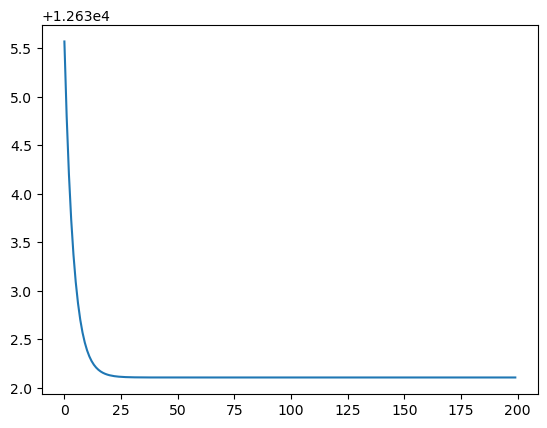

In [110]:
plt.plot(costs[:200]);

### _Ofcourse, our NN needs more Hyperparameter tuning, but this is our basic model, **AND, IT'S WORKING**!_